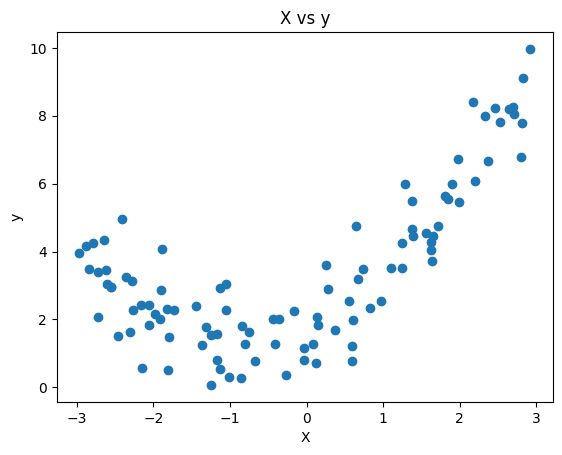

In [10]:
import numpy as np 
np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y')
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
display(X[0])
display(X_poly[0])

array([-0.75275929])

array([-0.75275929,  0.56664654])

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

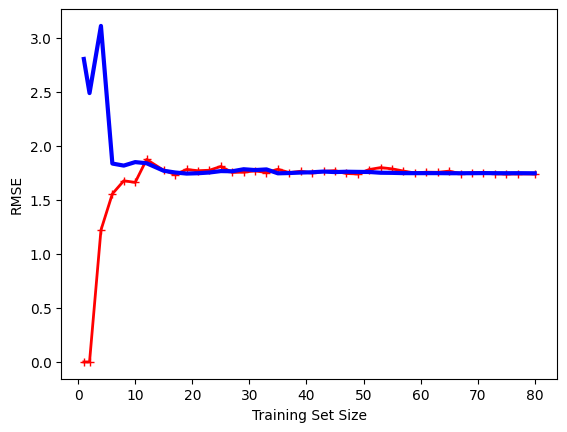

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors,'r+-', linewidth=2, label='Train')
plt.plot(train_sizes, valid_errors,'b-',linewidth=3, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.show()

가중치: [6.11591202]
절편: 1.5304406984452434


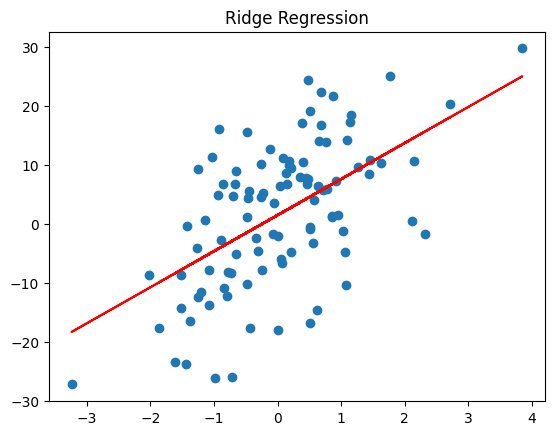

In [14]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, noise=10)

model = Ridge(alpha=10.0)  # 규제 강도
model.fit(X, y)

print("가중치:", model.coef_)
print("절편:", model.intercept_)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Ridge Regression")
plt.show()

In [15]:
from sklearn.linear_model import Ridge

# solver = Cholesky decomposition | default solver = auto | auto는 희소행렬이나 특이 행렬이 아닐 경우 'cholesky' 사용  
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([11.44677763])

In [16]:
from sklearn.linear_model import ElasticNet

# ElasticNet은 L1(라쏘)과 L2(릿지) 규제를 모두 사용
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([11.00560663])

# 로지스틱

In [17]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
display(list(iris))
display(iris.data.head(3))
display(iris.target.head(3))
display(iris.target_names)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


0    0
1    0
2    0
Name: target, dtype: int64

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

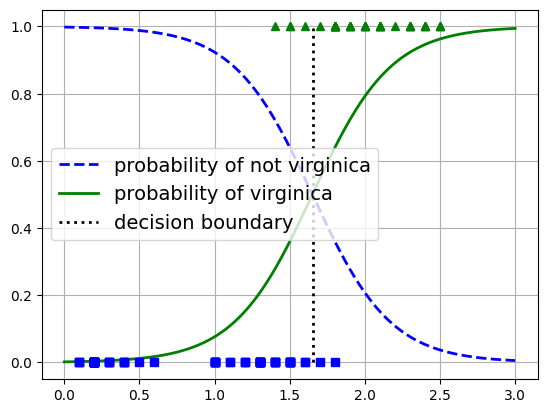

In [30]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.plot(X_new, y_proba[:,0],"b--", linewidth=2,
         label="probability of not virginica")
plt.plot(X_new, y_proba[:,1],"g-", linewidth=2, 
         label="probability of virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="decision boundary")
plt.plot(X_train[y_train==0], y_train[y_train==0], "bs")
plt.plot(X_train[y_train==1], y_train[y_train==1], "g^")
plt.legend(loc="center left", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
display(log_reg.predict([[1.7], [1.5]]))
display(log_reg.predict_proba([[1.7], [1.5]]))

array([ True, False])

array([[0.45283447, 0.54716553],
       [0.6403484 , 0.3596516 ]])

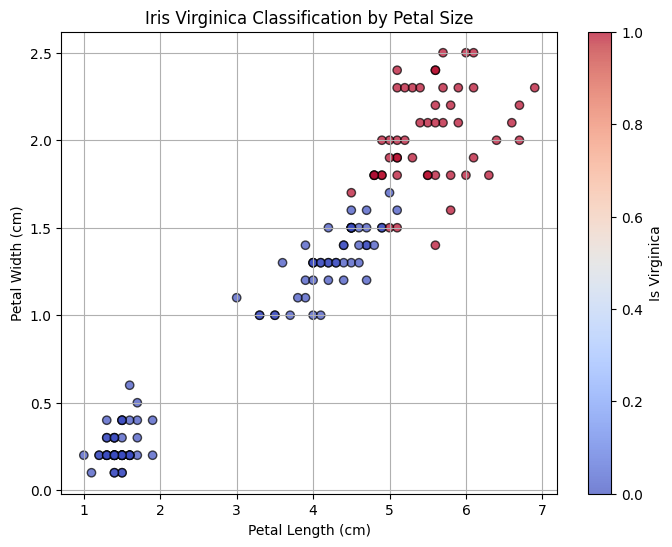

In [41]:

# 꽃잎 길이(petal length), 꽃잎 너비(petal width)로 virginica 여부 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    iris.data['petal length (cm)'], 
    iris.data['petal width (cm)'], 
    c=(iris.target_names[iris.target] == 'virginica'), 
    cmap='coolwarm', edgecolor='k', alpha=0.7
)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Virginica Classification by Petal Size')
plt.colorbar(label='Is Virginica')
plt.grid(True)
plt.show()

$$S_{k}(X) = (\theta^{(k)})^{T}x
​$$

In [ ]:
import numpy as np

# 입력 벡터 x
x = np.array([1.0, 2.0, 3.0])

# 클래스가 3개 있다고 가정하고, 각 클래스에 대한 가중치 벡터를 정의
theta = np.array([
    [0.1, 0.2, 0.3],  # θ^(0)
    [0.4, 0.5, 0.6],  # θ^(1)
    [0.7, 0.8, 0.9]   # θ^(2)
])

# 각 클래스에 대해 S_k(x) = θ^(k)^T x 계산
scores = theta @ x  # @는 행렬 곱 (또는 np.dot(theta, x))

# 결과 출력
for k, score in enumerate(scores):
    print(f"S_{k}(x) = {score:.3f}")


S_0(x) = 1.400
S_1(x) = 3.200
S_2(x) = 5.000


In [ ]:
# uni
print("\U0003156D")

𱕭


In [5]:
import pandas as pd
import numpy as np
import time

df = pd.DataFrame({
    'col1': np.random.randint(0, 100, size=10000000),
    'col2': np.random.randint(0, 100, size=10000000)
})

row_idx = 500_000
col_name = 'col2'

start_loc = time.time()
for _ in range(10000):
    val = df.loc[row_idx, col_name]
end_loc = time.time()

start_at = time.time()
for _ in range(10000):
    val = df.at[row_idx, col_name]
end_at = time.time()

print(f"loc time: {round(end_loc - start_loc, 6)} seconds")
print(f"at time: {round(end_at - start_at, 6)} seconds")
print(f"Speedup: {round((end_loc - start_loc) / (end_at - start_at), 2)}x faster with at")

loc time: 0.051658 seconds
at time: 0.020642 seconds
Speedup: 2.5x faster with at


||----------|----------|
|:---------:|:--------:|:--------:|
|a|----------|----------|
|b|----------|----------|